<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day70.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Positional Encoding and Feed-Forward Networks

# Understanding the Role of Positional Encoding in Transformers

* **Why Positional Encoding?**
    * Unlike RNNs, Transformers do not process sequences sequentially
    * They process all tokens in parallel
    * Transformers lack inherent knowledge of token positions, which is crucial for tasks like translation or sequence modeling

* **What is Positional Encoding?**
    * Positional encoding introduces information about the order of tokens in a sequence
    * It allows the model to differentiate between identical tokens in different positions

# Mathematical Foundation and Implementation of Positional Encoding

* **Sinusoidal Positional Encoding**
    * Encodes positional information using sine and cosine functions
    * Formula for positional encoding:

$$PE(pos, 2i) = \sin\left(\frac{pos}{10000^{\frac{2i}{d}}}\right)$$
$$PE(pos, 2i + 1) = \cos\left(\frac{pos}{10000^{\frac{2i}{d}}}\right)$$

* **Where:**
    * **pos**: Position of the token in the sequence
    * **i**: Index of the embedding dimension
    * **d**: Total embedding dimension

* **Why Sinusoidal Functions?**
    * Provides unique encoding for each position.
    * Allows generalization to longer sequences not seen during training

# The Feed-Forward Network

* **What is a Feed-Forward Network (FFN)?**
    * FFNs are fully connected layers applied to each token independently and identically within a Transformer layer
    * Adds non-linear transformation to the output of the attention mechanism

* **Role in Transformers**
    * Captures token-specific transformations
    * Enhances representational capacity

* **Structure**
    * Linear transformation
    * Non-linear activation (e.g., ReLU)
    * Another linear transformation
    * Formula:

$$FFN(x) = \text{ReLU}(xW_1 + b_1)W_2 + b_2$$

**Objective**

- Implement positional encoding and integrate it with a basic Transformer model

- Experiment with different positional encoding methods and observe the effects

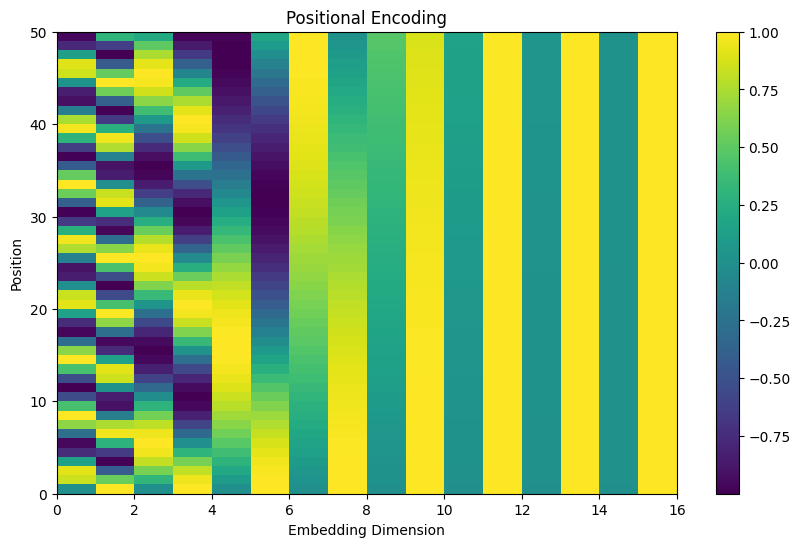

TransformerWithPositionalEncoding(
  (embedding): Embedding(50, 16)
  (multihead_attention): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
  )
  (ffn): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
  )
  (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
)
LearnablePositionalEncoding()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define positional encoding function
def positional_encoding(seq_len, embed_dim):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(embed_dim)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(embed_dim))
    angle_rads = pos * angle_rates

    # Apply sine to even indices and cosine to odd indices
    pos_encoding = np.zeros(angle_rads.shape)
    pos_encoding[:, 0::2] = np.sin(angle_rads[:, 0::2])
    pos_encoding[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return pos_encoding

# Generate position encoding
seq_len = 50
embed_dim = 16
pos_encoding = positional_encoding(seq_len, embed_dim)

# Visualize positional encoding
plt.figure(figsize=(10, 6))
plt.pcolormesh(pos_encoding, cmap='viridis')
plt.colorbar()
plt.title("Positional Encoding")
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.show()

import torch
import torch.nn as nn

class TransformerWithPositionalEncoding(nn.Module):
    def __init__(self, embed_dim, seq_len, num_heads, ff_dim):
        super(TransformerWithPositionalEncoding, self).__init__()
        self.embedding = nn.Embedding(seq_len, embed_dim)
        self.positional_encoding = nn.Parameter(torch.tensor(positional_encoding(seq_len, embed_dim), dtype=torch.float32), requires_grad=False)
        self.multihead_attention = nn.MultiheadAttention(embed_dim, num_heads)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)

    def forward(self, x):
      # Add positional encoding to embedding
      x = self.embedding(x) + self.positional_encoding
      # Self Attention
      attn_output, _ = self.multihead_attention(x, x, x)
      x = self.norm1(x + attn_output)
      # Feed Forward Network
      ffn_output = self.ffn(x)
      x = self.norm2(x + ffn_output)
      return x

# Define model parameters
embed_dim = 16
seq_len = 50
num_heads = 4
ff_dim = 64

model = TransformerWithPositionalEncoding(embed_dim, seq_len, num_heads, ff_dim)
print(model)

# Learnable positional encoding
class LearnablePositionalEncoding(nn.Module):
    def __init__(self, seq_len, embed_dim):
        super(LearnablePositionalEncoding, self).__init__()
        self.positional_encoding = nn.Parameter(torch.zeros(seq_len, embed_dim))

    def forward(self, x):
        return x + self.positional_encoding

learnable_pe = LearnablePositionalEncoding(seq_len, embed_dim)
print(learnable_pe)